<a href="https://colab.research.google.com/github/ahatasham5/Breast_Cancer_Prognosis/blob/main/test_alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div style="color:yellow;display:inline-block;border-radius:5px;background-color:#007BA7;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:yellow;overflow:hidden;font-size:100%;letter-spacing:0.5px;margin:0"><b> </b> Import Modules</p></div>

In [1]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split

In [2]:
import torch
import torchvision.models as models
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
from torch import nn, optim
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
import torchvision.models as models

def create_model(model_name, num_classes):
    """Creates a model based on the given name.

    Args:
        model_name (str): Name of the model (e.g., 'resnet50', 'vgg16', 'alexnet')
        num_classes (int): Number of output classes for the model

    Returns:
        torch.nn.Module: The initialized model.
    """
    if model_name == 'resnet50':
        model = models.resnet50(pretrained=True)
    elif model_name == 'vgg16':
        model = models.vgg16(pretrained=True)
    elif model_name == 'alexnet':
        model = models.alexnet(pretrained=True)
    else:
        raise ValueError(f"Unknown model name: {model_name}")

    # Freeze pre-trained layers
    for param in model.parameters():
        param.requires_grad = False

    # Replace final fully connected layer
    num_ftrs = model.classifier[6].in_features  # Adjust index if necessary
    model.classifier[6] = nn.Linear(num_ftrs, num_classes)

    return model

In [4]:
# Choose your desired model
model_name = 'alexnet'  # or 'vgg16', 'alexnet'
num_classes = 1  # For binary classification

# Create the model
model = create_model(model_name, num_classes)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)  # Move the model to your device (CPU or GPU)

# ... (your training and evaluation code)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 99.9MB/s]


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
ls

drive/  sample_data/


In [8]:
%cd /content/drive/MyDrive/CSE/

/content/drive/MyDrive/CSE


In [9]:
ls

'Biglycan breast cancer dataset'/   model_checkpoint_alexnet.pth   model_checkpoint_eff.pth


In [10]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image to 224x224 for ResNet
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalization for ResNet
])

# Load your dataset
dataset = datasets.ImageFolder("Biglycan breast cancer dataset", transform=transform)

# Splitting dataset into train and validation
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [11]:
ls

'Biglycan breast cancer dataset'/   model_checkpoint_alexnet.pth   model_checkpoint_eff.pth


In [12]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.classifier[6].parameters(), lr=5e-5)

In [13]:
ls

'Biglycan breast cancer dataset'/   model_checkpoint_alexnet.pth   model_checkpoint_eff.pth


In [14]:
import torch

# Define the checkpoint file path
checkpoint_path = 'model_checkpoint_alexnet.pth'

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1).type_as(outputs))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

    # Save the checkpoint after each epoch
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': running_loss / len(train_loader)
    }, checkpoint_path)

Epoch 1, Loss: 0.7209570209185282
Epoch 2, Loss: 0.712008515993754
Epoch 3, Loss: 0.6883961624569364
Epoch 4, Loss: 0.6741531756189134
Epoch 5, Loss: 0.6959203547901578
Epoch 6, Loss: 0.6695084902975295
Epoch 7, Loss: 0.6603542102707757
Epoch 8, Loss: 0.6444622808032565
Epoch 9, Loss: 0.6575502554575602
Epoch 10, Loss: 0.6551101273960538
Epoch 11, Loss: 0.6282524466514587
Epoch 12, Loss: 0.6353385249773661
Epoch 13, Loss: 0.6342593365245395
Epoch 14, Loss: 0.6191253330972459
Epoch 15, Loss: 0.6247981786727905
Epoch 16, Loss: 0.6214253505071005
Epoch 17, Loss: 0.5937864780426025
Epoch 18, Loss: 0.6089167131317986
Epoch 19, Loss: 0.6259117523829142
Epoch 20, Loss: 0.588711659113566
Epoch 21, Loss: 0.6070878439479404
Epoch 22, Loss: 0.5940339631504483
Epoch 23, Loss: 0.5827704005771213
Epoch 24, Loss: 0.597348517841763
Epoch 25, Loss: 0.577855110168457
Epoch 26, Loss: 0.5743252568774753
Epoch 27, Loss: 0.5722316900889078
Epoch 28, Loss: 0.570363011625078
Epoch 29, Loss: 0.5660068723890517

In [15]:
ls

'Biglycan breast cancer dataset'/   model_checkpoint_alexnet.pth   model_checkpoint_eff.pth


In [16]:
import torch

# Define the checkpoint file path
checkpoint_path = 'model_checkpoint_alexnet.pth'

# Load the checkpoint
checkpoint = torch.load(checkpoint_path)
start_epoch = checkpoint['epoch'] + 1
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
loss = checkpoint['loss']

print(f"Resuming training from epoch {start_epoch}, with loss: {loss}")

num_epochs = 100
for epoch in range(start_epoch, num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1).type_as(outputs))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

    # Save the checkpoint after each epoch
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': running_loss / len(train_loader)
    }, checkpoint_path)

Resuming training from epoch 100, with loss: 0.4876026180055406


In [ ]:
import torch

# Load the saved model weights
model.load_state_dict(torch.load('model_checkpoint_alexnet.pth'))

RuntimeError: Error(s) in loading state_dict for AlexNet:
	Missing key(s) in state_dict: "features.0.weight", "features.0.bias", "features.3.weight", "features.3.bias", "features.6.weight", "features.6.bias", "features.8.weight", "features.8.bias", "features.10.weight", "features.10.bias", "classifier.1.weight", "classifier.1.bias", "classifier.4.weight", "classifier.4.bias", "classifier.6.weight", "classifier.6.bias". 
	Unexpected key(s) in state_dict: "epoch", "model_state_dict", "optimizer_state_dict", "loss". 

In [17]:
import torch

# Load the checkpoint
checkpoint = torch.load('model_checkpoint_alexnet.pth')
model.load_state_dict(checkpoint['model_state_dict'])

# Optionally, you can also load the optimizer state and other saved data
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']

In [18]:
model.eval()  # Set model to evaluation mode
all_preds = []
all_targets = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.sigmoid(outputs) > 0.5
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(labels.cpu().numpy())

# Calculate and print the evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(all_targets, np.array(all_preds).flatten()))

print("\nClassification Report:")
print(classification_report(all_targets, np.array(all_preds).flatten(), target_names=['Healthy', 'Cancerous']))


Confusion Matrix:
[[39  5]
 [ 8 16]]

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.83      0.89      0.86        44
   Cancerous       0.76      0.67      0.71        24

    accuracy                           0.81        68
   macro avg       0.80      0.78      0.78        68
weighted avg       0.81      0.81      0.81        68



In [19]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        # Apply sigmoid since we used BCEWithLogitsLoss
        predicted_probs = torch.sigmoid(outputs)

        # Convert probabilities to predicted class (0 or 1)
        predicted = predicted_probs > 0.5

        total += labels.size(0)
        correct += (predicted.flatten() == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 80.88%


Confusion Matrix:
[[39  5]
 [ 8 16]]

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.83      0.89      0.86        44
   Cancerous       0.76      0.67      0.71        24

    accuracy                           0.81        68
   macro avg       0.80      0.78      0.78        68
weighted avg       0.81      0.81      0.81        68


Accuracy: 80.88%
AUC: 0.86


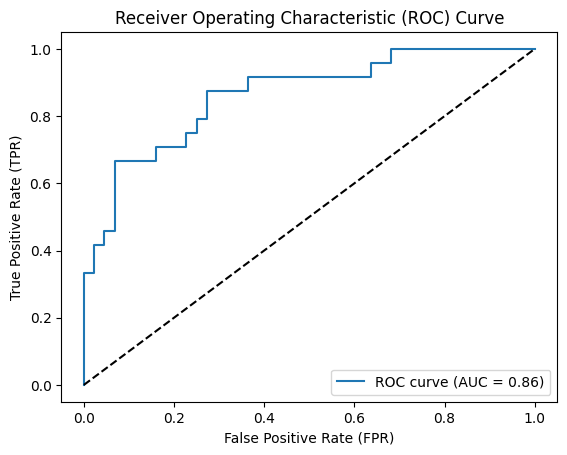

In [21]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, random_split
import torchvision.models as models
from torch import nn, optim
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ... (Previous code for model setup, training, and loading checkpoint)

# Evaluation
model.eval()
all_preds = []
all_targets = []
all_probs = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        probs = torch.sigmoid(outputs)
        preds = (probs > 0.5).float()
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(labels.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Calculate and print the evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(all_targets, np.array(all_preds).flatten()))

print("\nClassification Report:")
print(classification_report(all_targets, np.array(all_preds).flatten(), target_names=['Healthy', 'Cancerous']))

accuracy = np.sum(np.array(all_preds).flatten() == np.array(all_targets).flatten()) / len(all_targets)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

auc = roc_auc_score(all_targets, np.array(all_probs).flatten())
print(f"AUC: {auc:.2f}")

# Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(all_targets, np.array(all_probs).flatten())
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random prediction line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()